<a href="https://colab.research.google.com/github/DCabrini/images_transformation/blob/main/Redu%C3%A7%C3%A3o_de_Dimensionalidade_em_Imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[EN] **Dimensionality Reduction in Images for Neural Networks**

Perform the transformation of a colored image to gray levels (0 to 255) and to binarize it (0 and 255), black and white.

[PT] **Redução de Dimensionalidade em Imagens para Redes Neurais**

Efetuar a transformação de uma imagem colorida para níveis de cinza (0 a 255) e para binariza-la (0 e 255), preto e branco.


In [73]:
# Import the necessary libraries

import numpy as np
from PIL import Image
import requests
from io import BytesIO
from IPython.display import display

Original Image


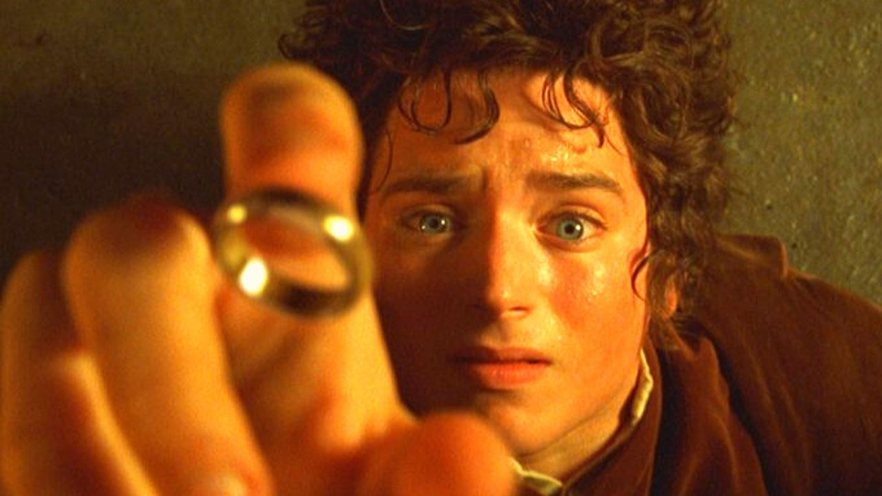

In [74]:
# Getting Image from Web
url = 'https://rollingstone.com.br/media/_versions/senhor-dos-aneis-frodo-assassino-divulgacao-netflix_widelg.jpg'

# Image Download
download = requests.get(url)

# Opening Image
img = Image.open(BytesIO(download.content))

# Showing image
print("Original Image")
display(img)


In [75]:
# Checking if the image is in RGB
print(img.mode == "RGB")

True


[EN] Converting a color image to grayscale: To convert a color image to grayscale, you can calculate the weighted average of the three color components (red, green, and blue) using the luminance formula:

**Gray =0.2989×R +0.5870×G +0.1140×B**

[PT] Converter a imagem colorida para tons de cinza:
Para converter uma imagem colorida para tons de cinza, você pode calcular a média ponderada das três componentes de cor (vermelho, verde e azul) usando a fórmula de luminância:

**Cinza = 0.2989×R + 0.5870×G + 0.1140×B**

In [76]:
# Function to convert the image to grayscale
def image_gray(image):
  width, height = image.size
  image_gray = np.zeros((width, height), dtype = np.uint8)
  # Convert to grayscale
  for y in range(height):
    for x in range(width):
      r, g, b = image.getpixel((x, y))[:3] # Getting RGB values
      gray = int((0.2989*r) + (g*0.5870) + (b*0.1140))
      image_gray[x, y] = gray
  return image_gray


img_gray = image_gray(img)
img_gray = np.transpose(img_gray, (1, 0))

[EN] Binarizing the image: After converting to grayscale, you can binarize the image, i.e., transform it into black and white. Binarization is done with a threshold. If the pixel value is greater than the threshold, it becomes white (255); otherwise, it becomes black (0).

[PT] Binarizar a imagem:
Após a conversão para tons de cinza, você pode binarizar a imagem, ou seja, transformá-la em preto e branco. A binarização é feita com um limiar (threshold). Se o valor do pixel for maior que o limiar, ele se torna branco (255); caso contrário, será preto (0).

In [77]:
# Function to binarize the image
def image_black_white(image):
  threshold = 128
  image_binarize = (image > threshold)*255
  image_binarize = image_binarize.astype(np.uint8)
  return image_binarize

img_binarize = image_black_white(img_gray)
img_binarize = np.transpose(img_binarize, (0, 1))


Original Image


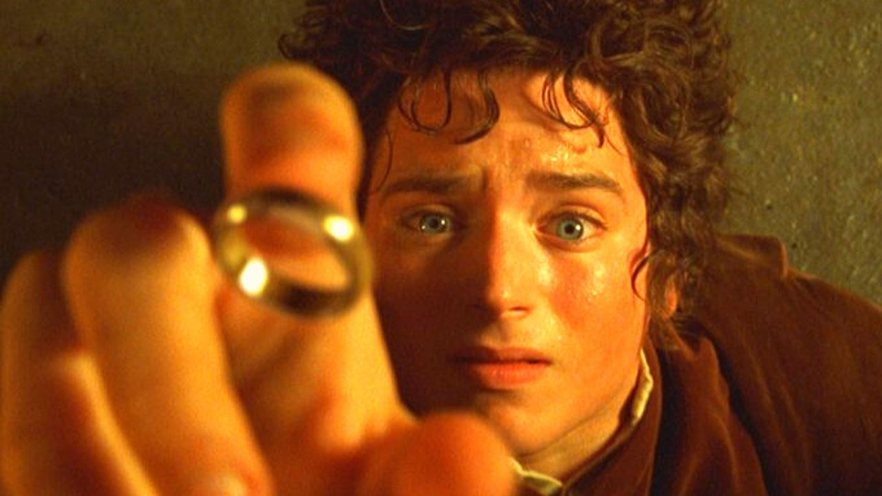

Grayscale Image


array([[48, 49, 50, ..., 74, 74, 74],
       [47, 48, 49, ..., 73, 74, 73],
       [47, 48, 49, ..., 76, 74, 75],
       ...,
       [66, 66, 69, ..., 24, 24, 24],
       [64, 65, 67, ..., 24, 25, 25],
       [63, 64, 65, ..., 24, 25, 25]], dtype=uint8)
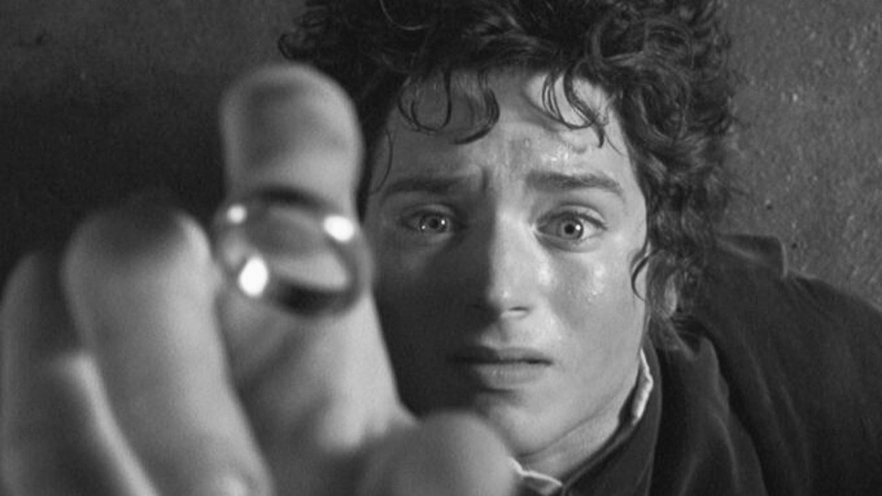

Binarized Image


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
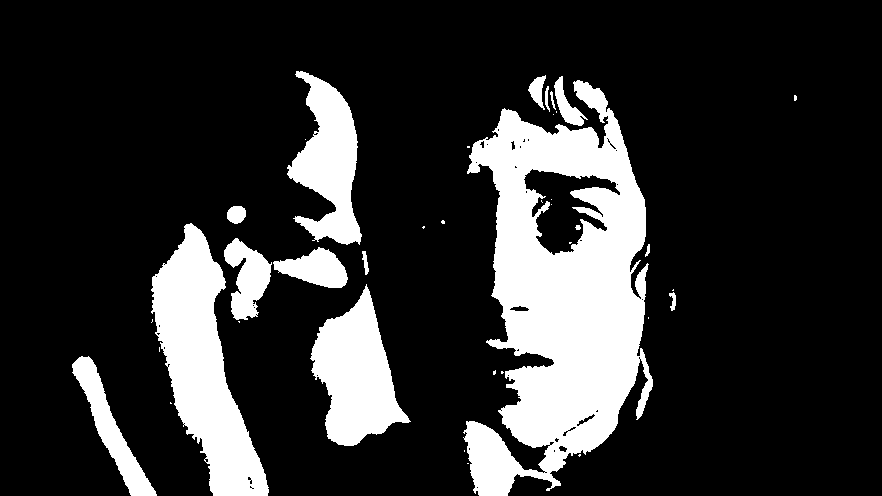

In [78]:
# Showing images
print("Original Image")
display(img)

print("Grayscale Image")
display(img_gray)

print("Binarized Image")
display(img_binarize)